In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
def cost_function(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    cost = (1 / m) * np.sum(np.square((h - y)))
    return cost

def gradient_descent(X, y, m, w, b):
    h = np.dot(w, X.T) + b
    dw = (1 / m) * np.sum(np.dot((h - y), X))
    db = (1 / m) * np.sum(h - y)
    return dw, db;

def feature_scaling(X, X_min, X_max):
    X = (X - X_min) / (X_max - X_min)
    return X

def predict(X, w, b):
    y = np.dot(w, X.T) + b
    return y

In [122]:
df = pd.read_csv("data/monthly_csv.csv")
df.head

<bound method NDFrame.head of         Date     Price
0    1950-01    34.730
1    1950-02    34.730
2    1950-03    34.730
3    1950-04    34.730
4    1950-05    34.730
..       ...       ...
842  2020-03  1593.764
843  2020-04  1680.030
844  2020-05  1715.697
845  2020-06  1734.032
846  2020-07  1840.807

[847 rows x 2 columns]>

In [123]:
# Load data into variables
array = df.to_numpy()

y = df.iloc[:, 1].to_numpy()
X = df.iloc[:, 0].str.replace("-", "").astype(int).to_numpy()

X_min = np.amin(X)
X_max = np.amax(X)

X = feature_scaling(X, X_min, X_max)
print(X[1:5])
print(y[1:5])


m = X.size

[0.00014273 0.00028547 0.0004282  0.00057094]
[34.73 34.73 34.73 34.73]


In [126]:
# Add polynomial features
X = X[None]

X2 = np.power(X, 2)
X3 = np.power(X, 3)

X2_min = np.amin(X2)
X2_max = np.amax(X2)

X3_min = np.amin(X3)
X3_max = np.amax(X3)

X2 = feature_scaling(X2, X2_min, X2_max)
X3 = feature_scaling(X3, X3_min, X3_max)

X = np.append(X, X2, axis=0)
X = np.append(X, X3, axis=0)

X = X.T

print(X2)


[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [2.03732228e-08 4.15068206e-16 8.45627703e-24]
  [8.14928911e-08 6.64109130e-15 5.41201730e-22]
  ...
  [9.99429142e-01 9.98858610e-01 9.98288404e-01]
  [9.99714551e-01 9.99429183e-01 9.99143897e-01]
  [1.00000000e+00 1.00000000e+00 1.00000000e+00]]]


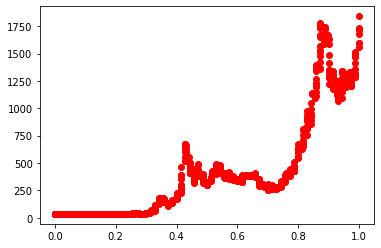

In [125]:
plt.scatter(X[:, 0].T, y, color="red")

In [108]:
# Model
w = np.zeros(3)[None]
b = 0

iterations = 1000
learning_rate = 0.08

for i in range(iterations):
    cost = cost_function(X, y, m, w, b)
    print("Cost: " + str(cost))
    dw, db = gradient_descent(X, y, m, w, b)
    w = w - learning_rate * dw
    b = b - learning_rate * db

Cost: 379088.88181210513
Cost: 262686.52672136045
Cost: 189532.447871663
Cost: 143402.61886685208
Cost: 114166.28324685911
Cost: 95497.1849729019
Cost: 83444.52645110912
Cost: 75540.7151167103
Cost: 70244.2650181648
Cost: 66591.95935942704
Cost: 63981.66947659415
Cost: 62036.751903276
Cost: 60521.38045245083
Cost: 59287.68068278184
Cost: 58242.720896307044
Cost: 57327.90102698644
Cost: 56506.08246267236
Cost: 55753.551131331355
Cost: 55054.998386368665
Cost: 54400.3861659385
Cost: 53782.988684435375
Cost: 53198.16876098186
Cost: 52642.61287659706
Cost: 52113.85268911873
Cost: 51609.96544316039
Cost: 51129.386114362016
Cost: 50670.78935307152
Cost: 50233.01504296369
Cost: 49815.021124239574
Cost: 49415.85347126265
Cost: 49034.62644832144
Cost: 48670.51016100252
Cost: 48322.72191533316
Cost: 47990.520330139734
Cost: 47673.20113084066
Cost: 47370.09401680963
Cost: 47080.56022171484
Cost: 46803.99052818677
Cost: 46539.8035868413
Cost: 46287.44444509322
Cost: 46046.383225831414
Cost: 45816.

Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.63264097329
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.63264097329
Cost: 40902.63264097329
Cost: 40902.6326409733
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.63264097329
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.63264097329
Cost: 40902.632640973294
Cost: 40902.63264097329
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.6326409733
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.6326409733
Cost: 40902.632640973294
Cost: 40902.6326409733
Cost: 40902.63264097329
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.632640973294
Cost: 40902.6326409733
Cost: 40902.632640973294
Cost: 40902.63264

In [109]:
print("w: " + str(w))
print("b: " + str(b))

w: [[471.00509885 471.00509885 471.00509885]]
b: -91.51740787569656


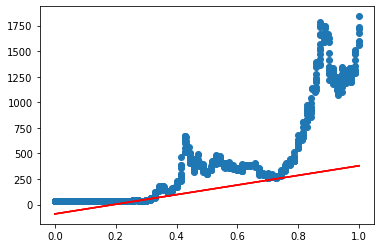

In [110]:
plt.plot(X, (w * X + b), "-r")
plt.scatter(X[:, 0].T, y)
plt.show()

In [102]:
# Prediction
X_predict = feature_scaling(202108, X_min, X_max)
y = predict(X_predict, w, b)
print("Predicted price for 2021-08: " + str(y))

Predicted price for 2021-08: [[386.27780159 386.27780159 386.27780159]]
